In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import beta
from scipy.special import gamma
from scipy.optimize import minimize

from numpy import trapz

In [3]:
def get_coef(a, b):
    return gamma(a)*gamma(b)/gamma(a+b)

In [4]:
x = np.linspace(0, 1, 5000)
prior = 0.5 * beta(10, 20).pdf(x) + 0.5 * beta(20, 10).pdf(x)
denominator = get_coef(13, 27)/get_coef(10, 20) + get_coef(23, 17)/get_coef(20, 10)
pi_1 = get_coef(13, 27)/get_coef(10, 20) / denominator
pi_2 = get_coef(23, 17)/get_coef(20, 10) / denominator
posterior = pi_1 * beta(13, 27).pdf(x) + pi_2 * beta(23, 17).pdf(x)

In [7]:
idx_low = np.argmin([np.abs(trapz(posterior[:idx], dx=x[1]-x[0]) - 0.05) for idx in range(0, len(x))])
conf_low = np.round(x[idx_low], 2)
idx_high = np.argmin([np.abs(trapz(posterior[:idx], dx=x[1]-x[0]) - (1 - 0.05)) for idx in range(0, len(x))])
conf_up = np.round(x[idx_high], 2)

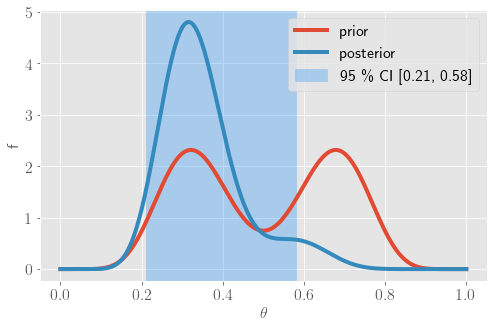

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(x, prior, label='prior')
plt.plot(x, posterior, label='posterior')
plt.xlabel(r'$\theta$')
plt.ylabel('f')
plt.axvspan(conf_low, conf_up, alpha=0.3, color='dodgerblue', label = f'95 \% CI [{conf_low}, {conf_up}]')
plt.legend()
plt.savefig('../figures/binom.png', dpi=300, bbox_inches='tight')